# Machine Learning 

Group 50 Members:

- Clara Pichler, 11917694
- Niklas Klenner, 11778405
- Hannah Knapp, 11901857 :'

### Overview

1. Introduction
- Original Research Questions
- Used Datasets
- Requirements & Dependencies

2. Data Preprocessing
- Loading in the Data sets
- Life Expectancy
- Animals

3. Data Exploration
- 

4. Conclusion


## Introduction

### Original Research Questions


### Used Datasets

__Life Expectancy:__

- _content_: Global Life Expectancy with Socio-Economic variables 2000-2019
- _timespan_: 2000-2019
- _source_: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank?rvi=1
Although many data frames on life expectancy are found on the Kaggle website, we chose this specific one by Shritej Shrikant Chavan, which was updated 2023. It was one of the few data sets that had data up to the year of 2019.


__Animal Dataset:__
- _content_: An In-Depth Animal Information Repository
- _source_: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-information-dataset?resource=download

### Requirements & Dependencies

This project was created using Python 3.12.5 The exact versions of the dependencies can be installed with the following command.

In [ ]:
%pip install -r requirements.txt -q

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import openpyxl
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

## Data Preprocessing

This will go over, how we prepared every dataframe seperately, changing types, filling in the missing values, handeling outliers, all only if necessary.

### Loading in the Data Sets

After downloading all the data frames, which are all saved in the folder `data`, we loaded each of them in by using `pandas`.


(Afterwards we check for missing data. One important question we have to think about is if missing data is still valid information or actually something that is useless for us.)

In [71]:
df_life_exp = pd.read_csv('data/life_expectancy.csv')
df_animals = pd.read_csv('data/Animal_Dataset.csv')

### Life Expectancy

In [36]:
display(df_life_exp.head(5))
df_life_exp.info(verbose=True)
df_life_exp.describe()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [38]:
display(df_life_exp["Year"].unique())
display(df_life_exp["Country Code"].unique(), len(df_life_exp["Country Code"].unique()))
display(df_life_exp["Region"].unique())
display(df_life_exp["IncomeGroup"].unique())

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BTN',
       'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COL',
       'COM', 'CRI', 'CUB', 'CYP', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GNB', 'GNQ', 'GRC', 'GRD',
       'GRL', 'GTM', 'GUM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IND', 'IRL', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KHM', 'KIR', 'KWT', 'LBN', 'LBR', 'LBY', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP',
       'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR', 'NPL', 'NRU', 'NZL', 'OMN', 'PAK', 'PAN', 'PER',
       'PHL', 'PLW',

174

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

Through the above code, we were able to have a first glimpse into the life expectancy dataset. The data ranges from the years 2001 till 2019 and has information about 174 unique countries across the world. We mostly want to focus on the feature _Life Expectancy World Bank_, since we want to predict it through regression. In the following steps we will transform the dataset to make it easier to work with and also look at the missing values.


For further description see Assignment 0.


(Since the region will play a part in the prediction, we need to change the nominal values into ordinal. We do need to keep in mind that these are just dummy variable when working with them.)

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

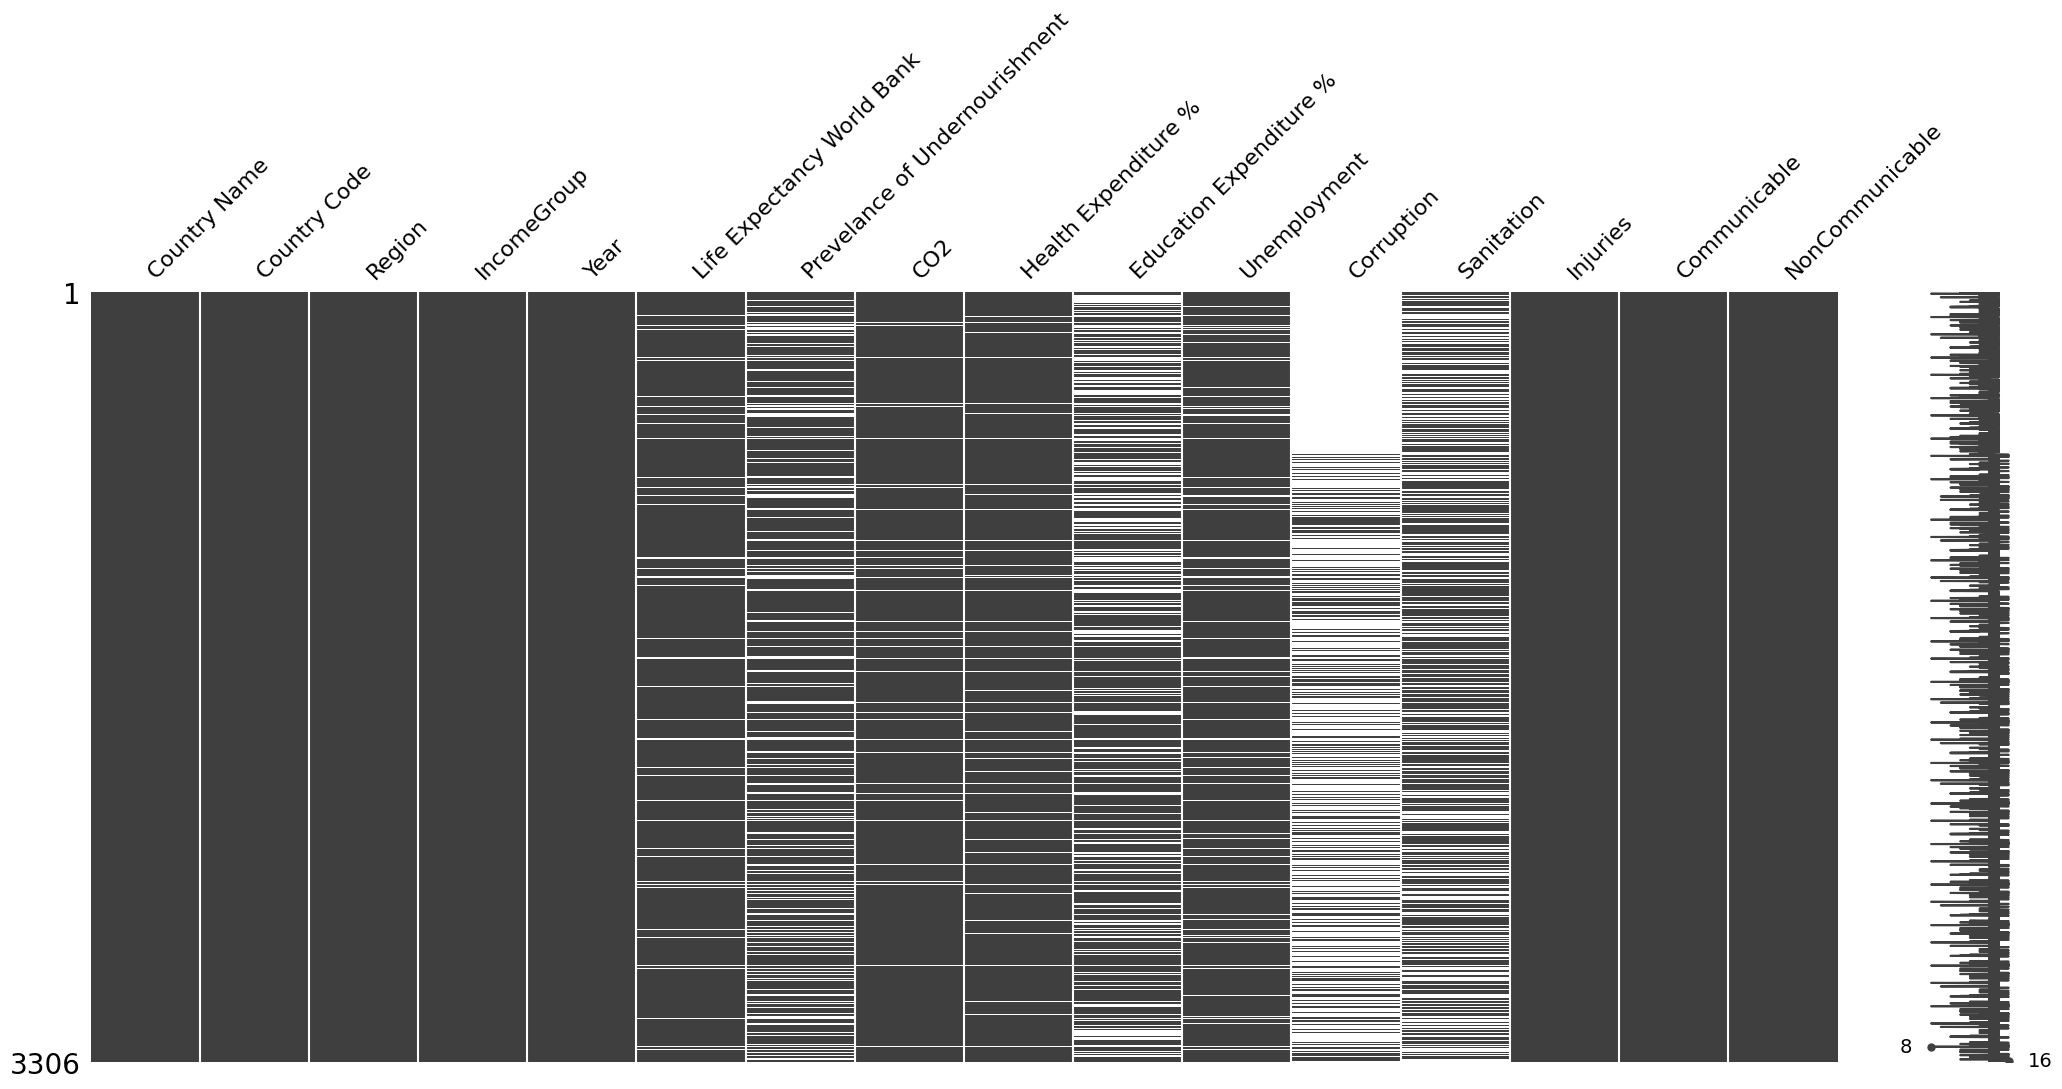

In [12]:
msno.matrix(df_life_exp)
df_life_exp.isna().sum()

There are numerous possibilities to deal with missing values. Although it sounds lazy, sometimes one can just delete a feature or row if it's not worth it to fill the missing values in since the given data is not enough to fill out the missing values correctly. 

In [ ]:
# df_life_exp =df_life_exp.drop(['Corruption', 'Education Expenditure %', 'Prevelance of Undernourishment'], axis=1)

In [29]:
display(df_life_exp[df_life_exp["Life Expectancy World Bank"].isna()]["Country Name"])
display(df_life_exp[df_life_exp["Unemployment"].isna()]["Country Name"])
display(df_life_exp[df_life_exp["Life Expectancy World Bank"].isna() & df_life_exp["Unemployment"].isna()]["Country Name"].unique())

3                        Andorra
7                 American Samoa
42                      Dominica
95                        Monaco
100             Marshall Islands
                  ...           
3239    Northern Mariana Islands
3252                       Nauru
3259                       Palau
3275                  San Marino
3293                      Tuvalu
Name: Country Name, Length: 188, dtype: object

3                   Andorra
7            American Samoa
8       Antigua and Barbuda
22                  Bermuda
42                 Dominica
               ...         
3252                  Nauru
3259                  Palau
3275             San Marino
3284             Seychelles
3293                 Tuvalu
Name: Country Name, Length: 304, dtype: object

array(['Andorra', 'American Samoa', 'Dominica', 'Monaco',
       'Marshall Islands', 'Northern Mariana Islands', 'Nauru', 'Palau',
       'San Marino', 'Tuvalu'], dtype=object)

### Visualizations

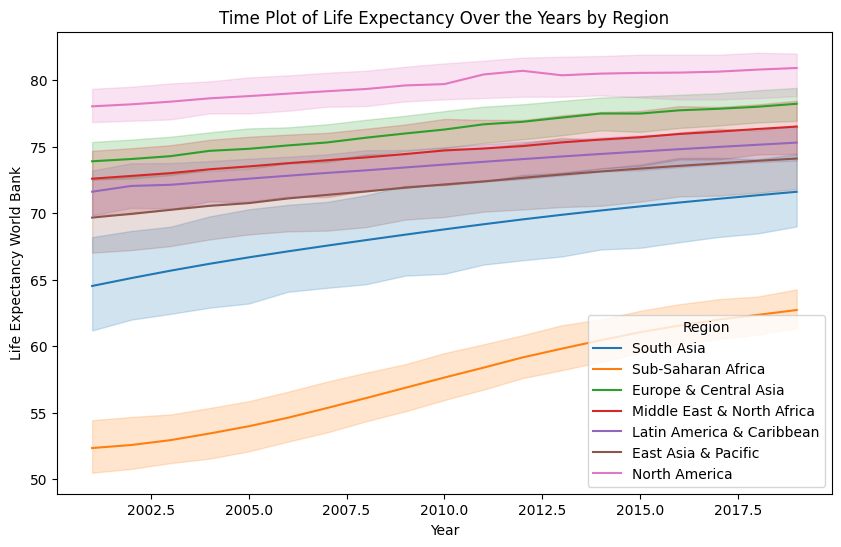

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life Expectancy World Bank', hue='Region', data=df_life_exp)
plt.title('Time Plot of Life Expectancy Over the Years by Region')
plt.show()

In [50]:
corrmat_life_exp = df_life_exp.corr(method='pearson', numeric_only=True)

<Axes: >

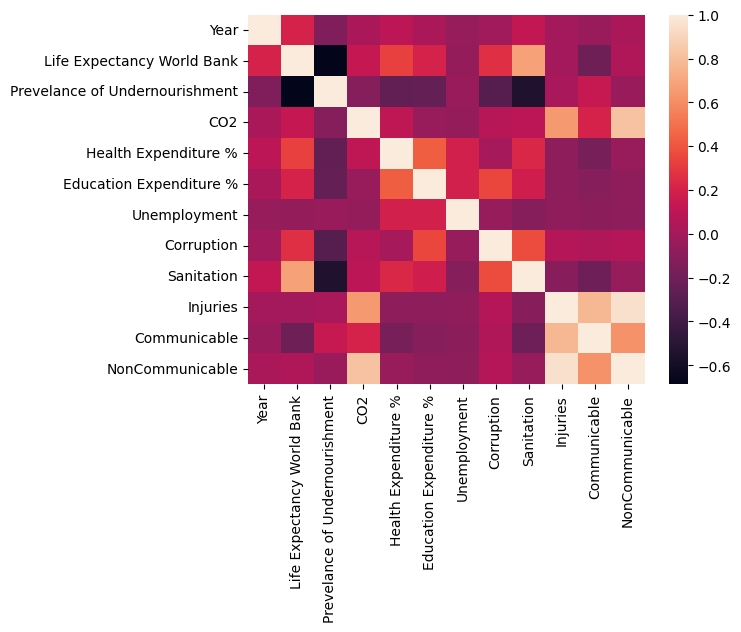

In [51]:
sns.heatmap(corrmat_life_exp)

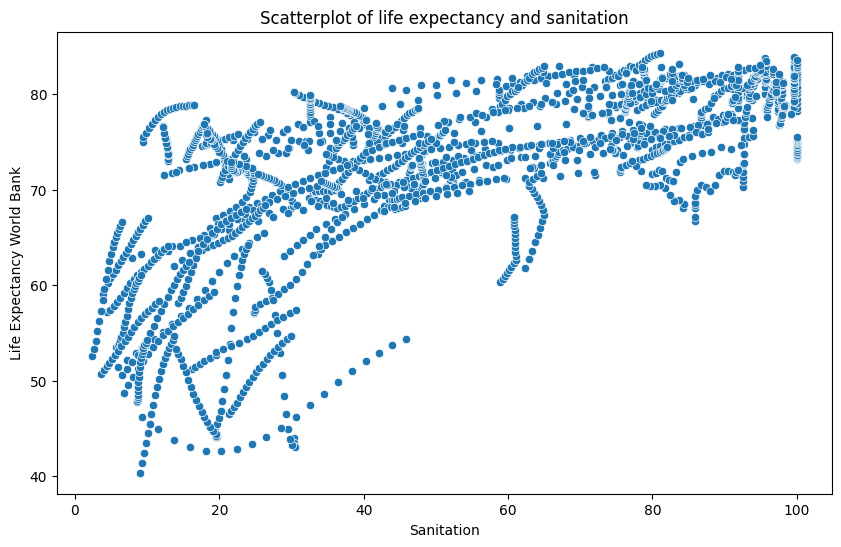

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sanitation', y='Life Expectancy World Bank', data=df_life_exp)
plt.title('Scatterplot of life expectancy and sanitation')
plt.show()

that looks absolutely insane

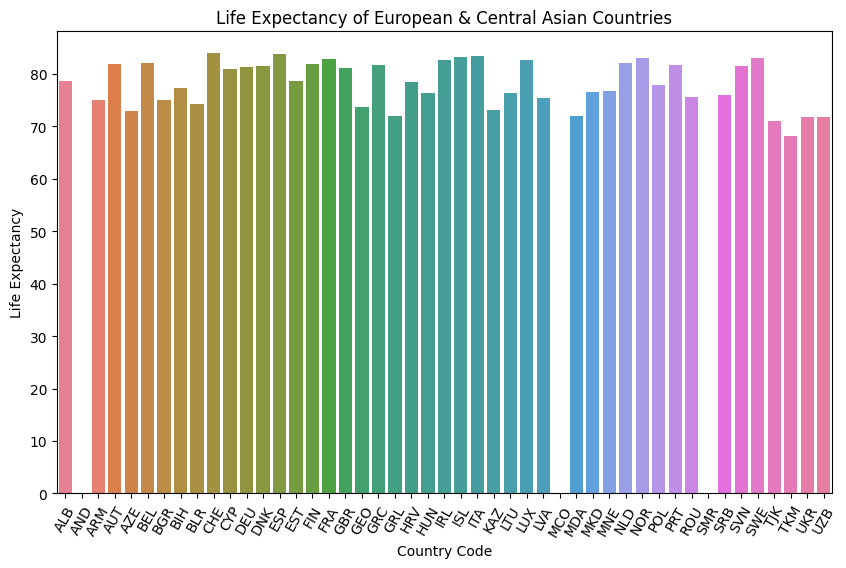

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Code', y='Life Expectancy World Bank', hue='Country Code', data=df_life_exp[(df_life_exp['Year']==2019) & (df_life_exp['Region']=='Europe & Central Asia')])
plt.title('Life Expectancy of European & Central Asian Countries')
plt.xlabel('Country Code')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=60)
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life Expectancy World Bank'}>,
        <Axes: title={'center': 'Prevelance of Undernourishment'}>],
       [<Axes: title={'center': 'CO2'}>,
        <Axes: title={'center': 'Health Expenditure %'}>,
        <Axes: title={'center': 'Education Expenditure %'}>],
       [<Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Corruption'}>,
        <Axes: title={'center': 'Sanitation'}>],
       [<Axes: title={'center': 'Injuries'}>,
        <Axes: title={'center': 'Communicable'}>,
        <Axes: title={'center': 'NonCommunicable'}>]], dtype=object)

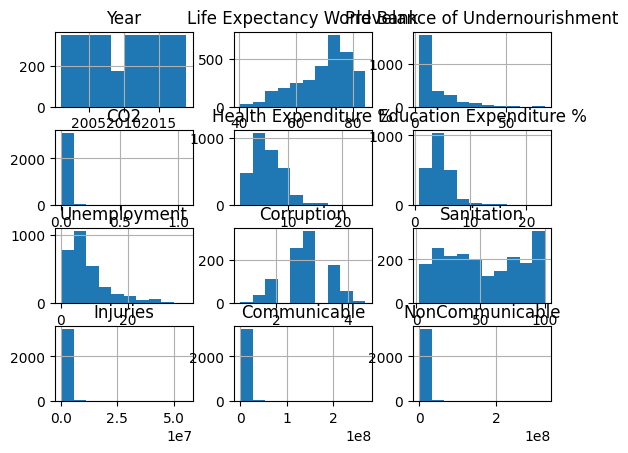

In [76]:
df_life_exp.hist()

## Animals



In [66]:
display(df_animals.head(5))
display(df_animals.info(verbose=True))
display(df_animals.columns)

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

None

Index(['Animal', 'Height (cm)', 'Weight (kg)', 'Color', 'Lifespan (years)',
       'Diet', 'Habitat', 'Predators', 'Average Speed (km/h)',
       'Countries Found', 'Conservation Status', 'Family',
       'Gestation Period (days)', 'Top Speed (km/h)', 'Social Structure',
       'Offspring per Birth'],
      dtype='object')

In [75]:
display(df_animals["Color"].unique(), len(df_animals["Color"].unique()))
display(df_animals["Diet"].unique(), len(df_animals["Diet"].unique()))
display(df_animals["Social Structure"].unique(), len(df_animals["Social Structure"].unique()))
display(df_animals["Conservation Status"].unique(), len(df_animals["Conservation Status"].unique()))
display(df_animals["Family"].unique(), len(df_animals["Family"].unique()))
display(df_animals["Habitat"].unique(), len(df_animals["Habitat"].unique()))

array(['Grey', 'Yellow-brown', 'Tan', 'Multicolored', 'Brown', 'Various',
       'Brown, White', 'White', 'Silver, Gold, Green', 'Black, White',
       'Gray, White', 'Brown, Gray', 'Black, Brown', 'Brown, Black',
       'Brown, Black, White', 'Gray, Brown', 'Yellowish-gray',
       'Orange, Black', 'Gray, Black', 'Pinkish-gray', 'Blue, White',
       'Blue', 'Blue-grey', 'Blue, Brown', 'Black', 'Reddish-brown',
       'Fawn, Brindle', 'Tan with Black Spots', 'Dark Brown', 'Orange',
       'Brown, Grey', 'Gray, Yellow', 'White, Black', 'Red, Brown',
       'Tan, Brown', 'Gray', 'Brown, Tan', 'Grayish-brown',
       'Brown, Spiny', 'Cream', 'Black, Yellow', 'Brown, Reddish-brown',
       'Varies', 'Dark Brown, Black', 'Brownish-gray', 'Black, Orange',
       'Green, Transparent', 'Golden, Reddish-brown', 'Olive-green',
       'Greenish-brown', 'Green', 'Pink, Gray', 'Silver, Gray',
       'Yellowish-brown', 'Yellow, Black', 'Brown, Green',
       'Reddish-Brown', 'Pink, Wrinkled', 'Gray

85

array(['Insectivore', 'Herbivore', 'Carnivore', 'Omnivore',
       'Carnivore, Piscivore', 'Omnivore, Insectivore',
       'Herbivore, Omnivore', 'Filter Feeder', 'Piscivore',
       'Insectivore, Herbivore', 'Scavenger', 'Carnivore, Scavenger',
       'Nectar, Insects', 'Carnivore, Insectivore', 'Omnivore, Herbivore',
       'Herbivore, Insectivore'], dtype=object)

16

array(['Solitary', 'Herd-based', 'Group-based', 'Colony-based', 'Flocks',
       'Social groups', 'Social pods', 'Pack-based', 'Varies', 'Eusocial'],
      dtype=object)

10

array(['Least Concern', 'Vulnerable', 'Endangered', 'Not Evaluated',
       'Near Threatened', 'Not Applicable', 'Critically Endangered',
       'Varies', 'Data Deficient', 'Extinct',
       'Extinct (around 58 million years ago)',
       'Extinct (around 4,000 years ago)'], dtype=object)

12

array(['Orycteropodidae', 'Hyaenidae', 'Elephantidae', 'Felidae',
       'Canidae', 'Bovidae', 'Dendrobatidae', 'Myrmecophagidae',
       'Equidae', 'Osteoglossidae', 'Alcidae', 'Delphinidae', 'Otariidae',
       'Ambystomatidae', 'Daubentoniidae', 'Tapiridae', 'Accipitridae',
       'Viverridae', 'Cercopithecidae', 'Cetorhinidae', 'Agamidae',
       'Rhinocerotidae', 'Psychrolutidae', 'Corvidae', 'Nymphalidae',
       'Balaenopteridae', 'Sulidae', 'Octopodidae', 'Hominidae',
       'Ctenidae', 'Ursidae', 'Pythonidae', 'Caviidae',
       'Cryptobranchidae', 'Pomacentridae', 'Latimeriidae', 'Chelydridae',
       'Indriidae', 'Dugongidae', 'Tachyglossidae', 'Gymnotidae',
       'Spheniscidae', 'Callitrichidae', 'Erinaceidae', 'Salamandridae',
       'Pteropodidae', 'Eupleridae', 'Testudinidae', 'Phasianidae',
       'Gavialidae', 'Enteroctopodidae', 'Helodermatidae',
       'Centrolenidae', 'Mitsukurinidae', 'Lamnidae', 'Boidae',
       'Cheloniidae', 'Myxinidae', 'Phocidae', 'Hippopotam

120

array(['Savannas, Grasslands', 'Grasslands, Savannas', 'Savannah, Forest',
       'Savannahs', 'Mountains, Alpine', 'Amazon Rainforest',
       'Grasslands, Plains', 'Grasslands, Forests',
       'Middle East, North Africa', 'Desert', 'Tundra',
       'Freshwater Rivers, Lakes', 'North Atlantic, Arctic',
       'Oceans, Coastal Areas', 'Coastal Waters', 'Lakes, Canals',
       'Rainforests', 'Rainforests, Grasslands', 'Forests, Lakes, Coasts',
       'Forests', 'Forests, Mountains', 'Oceans', 'Deserts, Woodlands',
       'Grasslands', 'Grasslands, Mangroves', 'Deep-sea',
       'Forests, Urban Areas', 'Coastal Areas', 'Coral Reefs, Tide Pools',
       'Human Dwellings', 'Grasslands, Swamps', 'Freshwater',
       'Coral Reefs', 'Deep-sea, Caves', 'Rainforests, Madagascar',
       'Worldwide', 'Forests, Grasslands', 'Coastal Waters, Seagrass',
       'Amazon Basin', 'Antarctic', 'Gardens, Grasslands',
       'Sahara Desert', 'Forests, Caves', 'Northern Australia',
       'Galápagos Islan

97

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Habitat                    0
Predators                  0
Average Speed (km/h)       0
Countries Found            0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
dtype: int64

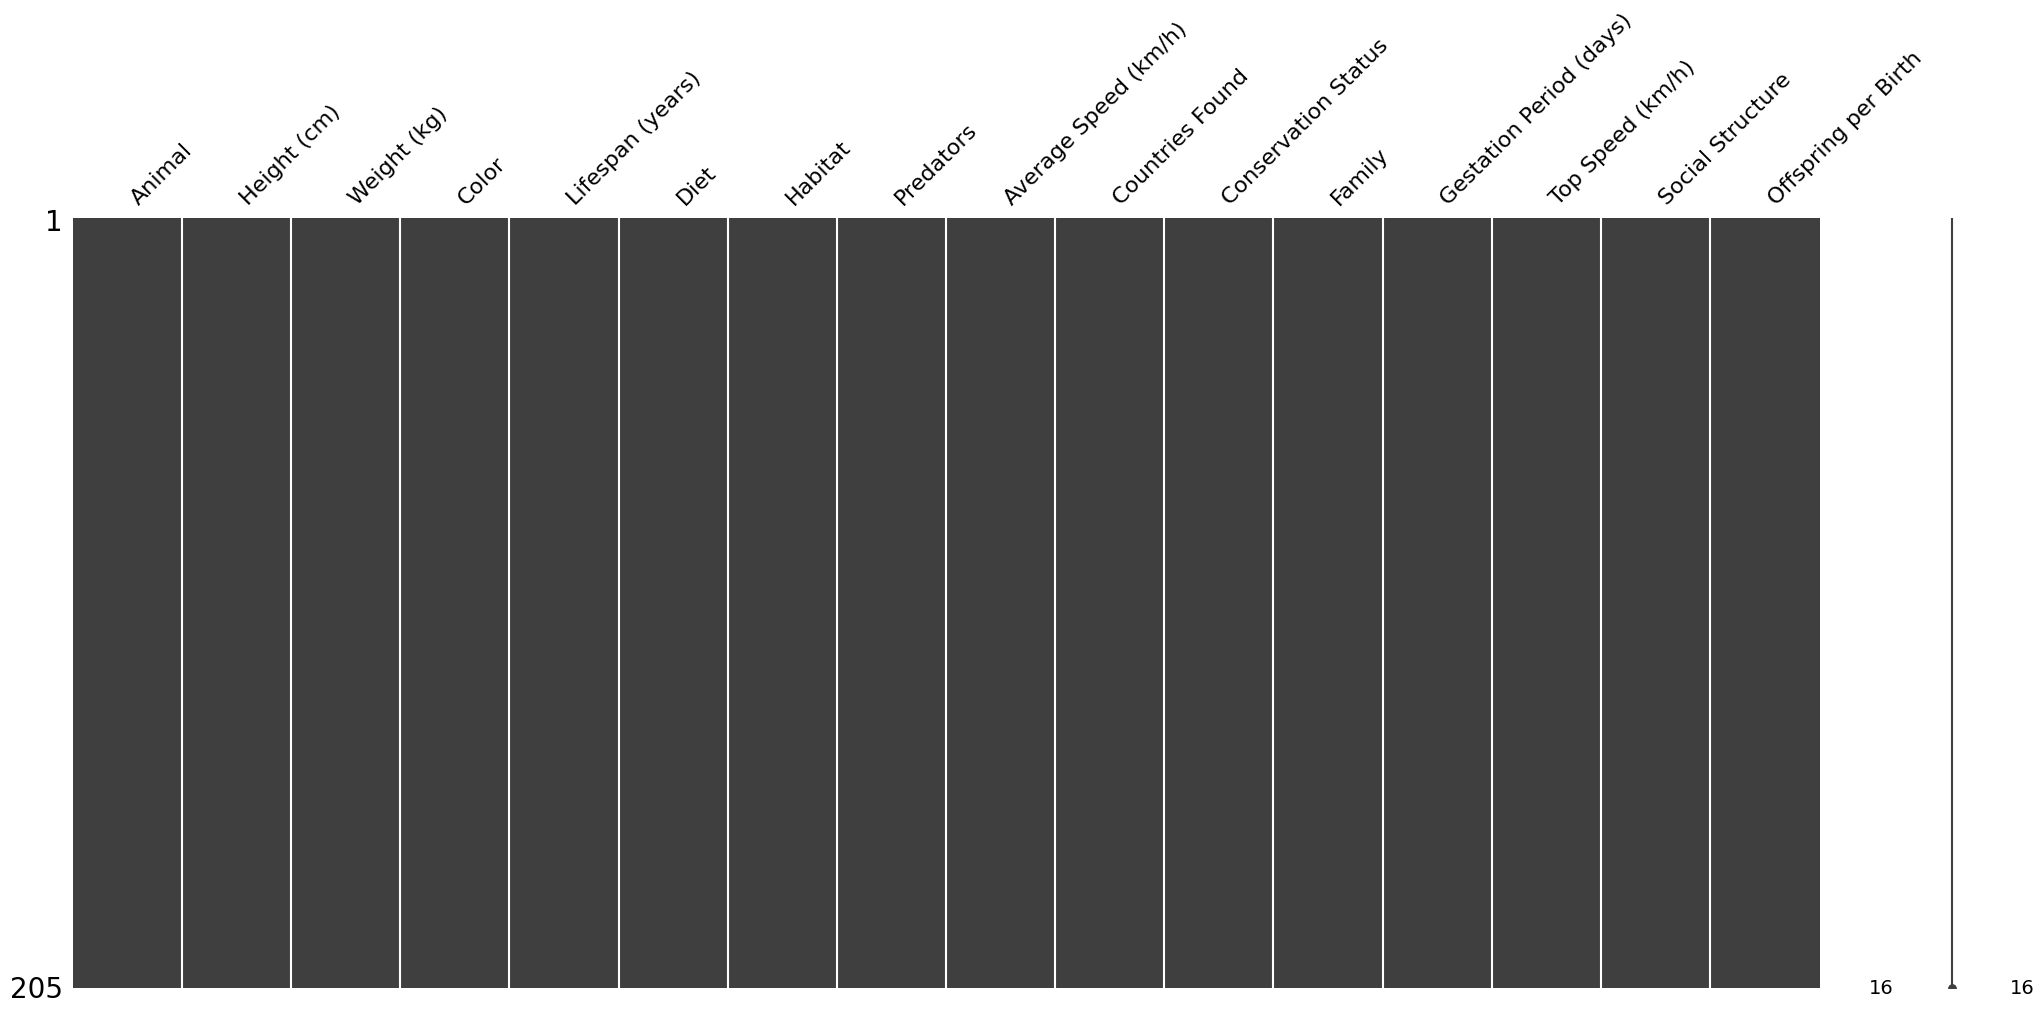

In [68]:
msno.matrix(df_animals)
df_animals.isna().sum()

ValueError: hist method requires numerical or datetime columns, nothing to plot.